In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [14]:
data = pd.read_csv('../file/data_ver3.csv')
data

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균(10^6km)
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333
9,2000,2.952604,25637.87,6.11,1.750909,9.457500


In [25]:
# 'Year' 컬럼 제외하고 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.drop(columns=['Year']))

# 표준화된 데이터프레임 생성
standardized_df = pd.DataFrame(standardized_data, columns=data.columns[1:])
standardized_df['Year'] = data['Year']
print("Standardized Data:")
print(standardized_df)

Standardized Data:
    sealevel       co2   Population  Thickness  북극 해빙면적 평균(10^6km)  Year
0  -1.455011 -1.366766    -1.726459   1.588964            0.880809  1990
1  -1.453756 -1.321689    -1.595138   1.545938            1.041190  1991
2  -1.357135 -1.336558    -1.478407   1.539427            1.812461  1992
3  -1.452501 -1.306931    -1.347086   1.157720            1.187155  1993
4  -1.271808 -1.277177    -1.230356   1.329691            1.574592  1994
5  -1.044687 -1.068767    -0.982305   0.998934            1.163728  1996
6  -0.694595 -0.833424    -0.865574   1.161851            0.769083  1997
7  -1.002024 -0.920226    -0.748844   0.718521            0.790707  1998
8  -0.604249 -0.906695    -0.632114   0.464093            0.934870  1999
9  -0.483787 -0.758117    -0.515384   0.379062            0.424894  2000
10 -0.417282 -0.738785    -0.398654   0.569745            0.666367  2001
11 -0.513902 -0.572820    -0.281924   0.384078            0.206848  2002
12 -0.044603 -0.393423    -0.165

In [45]:
X = standardized_df.drop(columns=['sealevel'])
y = standardized_df['sealevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients,'\n\n')

r2_score = model.score(X_test, y_test)
print(f"R^2 점수: {r2_score:.2f}")

# 예측값
y_pred = model.predict(X_test)

print("예측값 :",y_pred)

                    Coefficient
co2                    0.468374
 Population           -0.148187
Thickness              0.077850
북극 해빙면적 평균(10^6km)     0.168268
Year                   0.106707 


R^2 점수: 0.92
예측값 : [-0.69609008  1.16596204 -0.76265681  0.76186452 -1.69786005 -0.33039106]


In [47]:
#-0.69609008 + 1.16596204 *  x1 -0.76265681 + 0.76186452 * x2 -1.69786005 -0.33039106

NameError: name 'ᄐ' is not defined

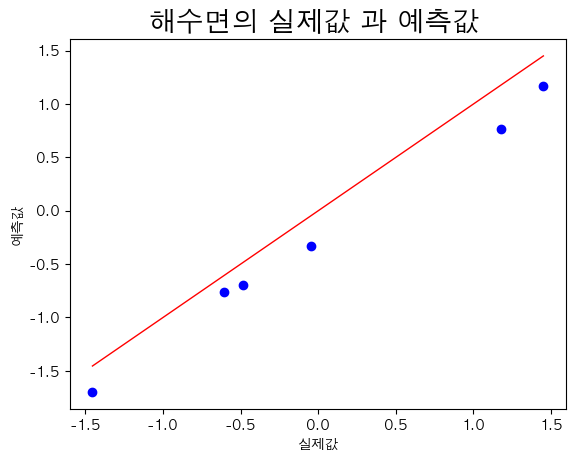

In [ ]:
plt.scatter(y_test, y_pred,c='blue')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('해수면의 실제값 과 예측값 ',size=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.show()


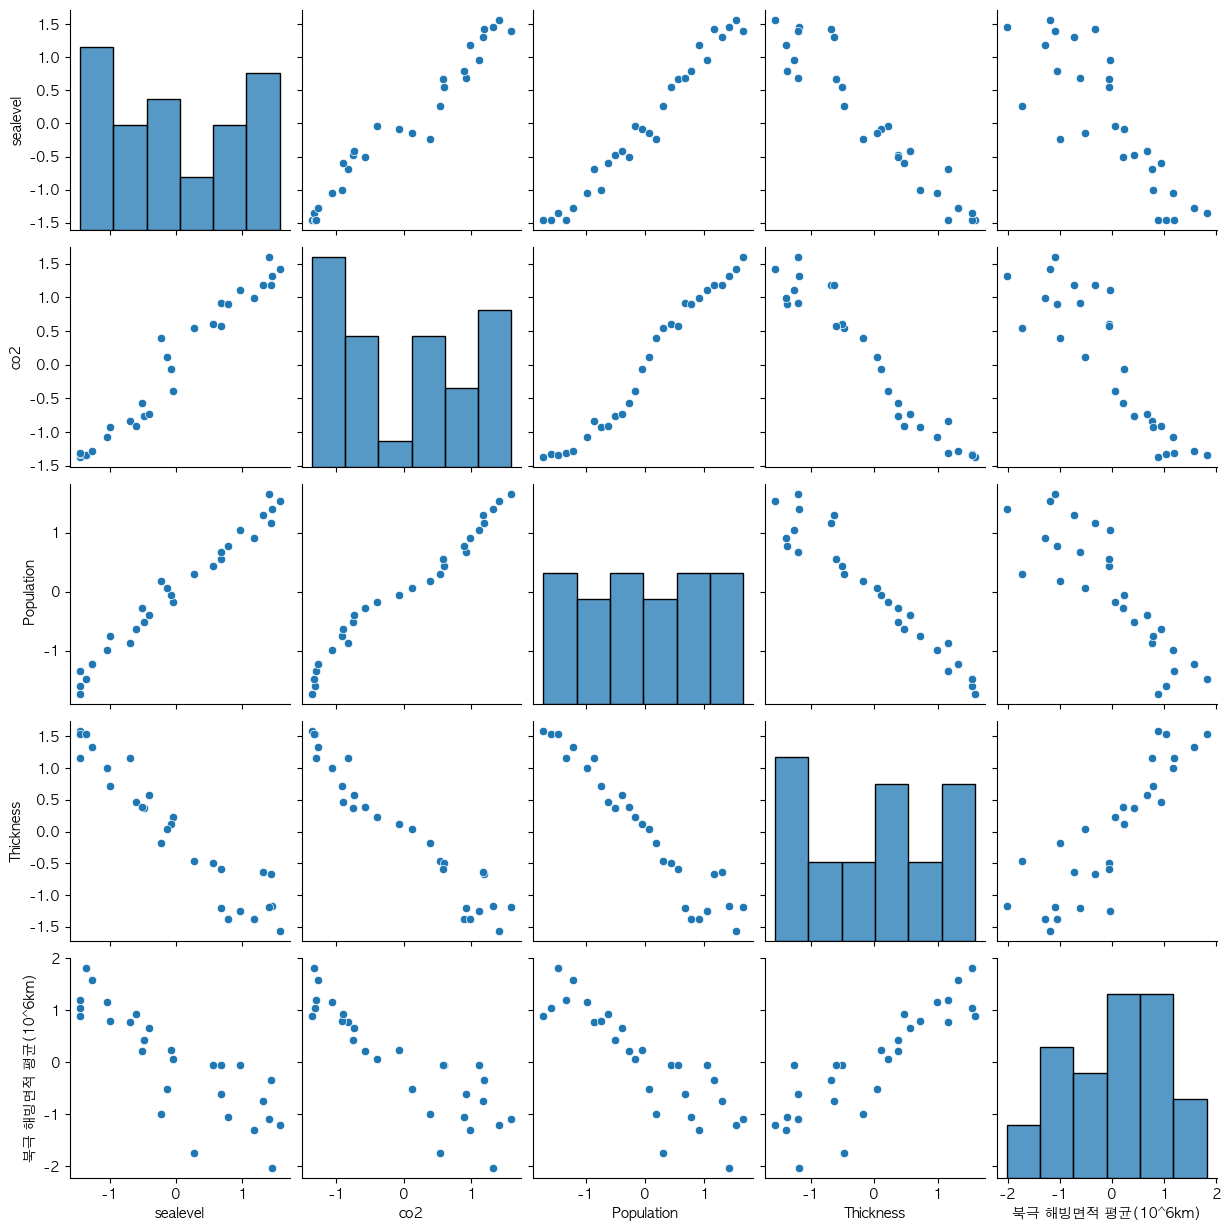

In [ ]:
sns.pairplot(standardized_df)
plt.show()

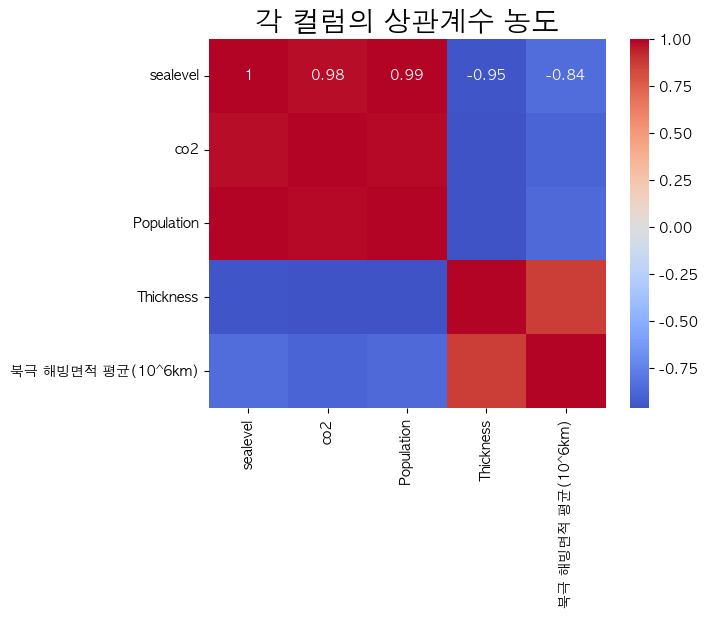

In [ ]:
sns.heatmap(standardized_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


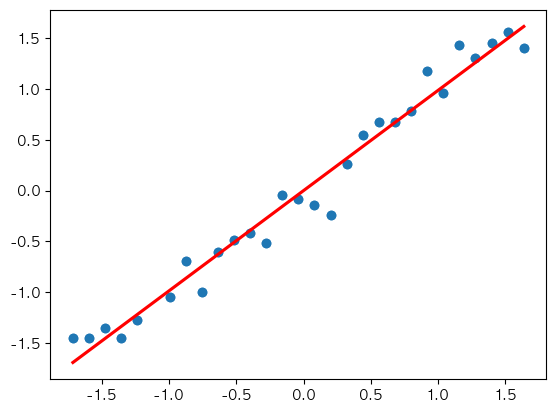

In [ ]:
plt.scatter(
    standardized_data[:,0],
    standardized_data[:,1]
)
sns.regplot(x=standardized_data[:, 0], y=standardized_data[:, 1], ci=None, line_kws={"color": "red"})
plt.show()

In [56]:
ondo = pd.read_csv('../file/oisst_month_20240604.csv')
ondo

,날짜,전지구 평균
0,﻿1982년 01월,18.05
1,﻿1982년 02월,18.10
2,﻿1982년 03월,18.14
3,﻿1982년 04월,18.08
4,﻿1982년 05월,18.02
...,...,...
503,﻿2023년 12월,18.61
504,﻿2024년 01월,18.81
505,﻿2024년 02월,18.89
506,﻿2024년 03월,18.90


In [57]:
ondo['날짜'] = ondo['날짜'].str.slice(0,5)
ondo

,날짜,전지구 평균
0,﻿1982,18.05
1,﻿1982,18.10
2,﻿1982,18.14
3,﻿1982,18.08
4,﻿1982,18.02
...,...,...
503,﻿2023,18.61
504,﻿2024,18.81
505,﻿2024,18.89
506,﻿2024,18.90


In [70]:
ondo = ondo.groupby('날짜').mean()
ondo = ondo.reset_index()
ondo = ondo.rename(columns={'날짜' : "Year"})
ondo = ondo.rename(columns={'전지구 평균' : "평균 온도"})


,Year,평균 온도
0,﻿1982,17.974167
1,﻿1983,18.055833
2,﻿1984,17.964167
3,﻿1985,17.869167
4,﻿1986,17.929167
5,﻿1987,18.071667
6,﻿1988,18.034167
7,﻿1989,17.970000
8,﻿1990,18.078333
9,﻿1991,18.073333


In [72]:
ondo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    43 non-null     object 
 1   평균 온도   43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 820.0+ bytes


In [74]:
ondo['Year'] = ondo['Year'].str.replace('\ufeff', '')

In [75]:
ondo.head()

,Year,평균 온도
0,1982,17.974167
1,1983,18.055833
2,1984,17.964167
3,1985,17.869167
4,1986,17.929167


In [76]:
ondo['Year'] = pd.to_numeric(ondo['Year'])

In [77]:
ondo.head()

,Year,평균 온도
0,1982,17.974167
1,1983,18.055833
2,1984,17.964167
3,1985,17.869167
4,1986,17.929167


In [78]:
data_ver3 = pd.merge(data,ondo,on='Year',how='inner')

In [82]:
seaondo = pd.read_csv('../file/airtemp_month_20240604.csv')

In [83]:
seaondo = seaondo.rename(columns={'날짜' : "Year"})
seaondo = seaondo.rename(columns={'전지구 평균' : "해상 평균 온도"})


In [85]:
seaondo['Year'] = seaondo['Year'].str.replace('\ufeff', '')

In [96]:
seaondo['Year'] = seaondo['Year'].str.slice(0,4)

In [89]:
seaondo = seaondo.groupby('Year').mean()

In [91]:
seaondo = seaondo.reset_index()

In [99]:
seaondo['Year'] = pd.to_numeric(seaondo['Year'])

In [100]:
data_ver3 = pd.merge(data,seaondo,on='Year',how='inner')

In [ ]:
seal = np.array(data['sealevel'])
nambing = np.array(data['남극 해빙면적 평균(10^6km)'])

In [50]:
fea = data.drop(columns=['sealevel'])
tar = data['sealevel']

In [104]:
data_ver3 = pd.merge(data_ver3,ondo,on='Year',how='inner')

---
## 컬럼 설명
- 년도
- 해수면 : 단위 ( mm
- 온실가스 : 단위 (톤
- 인구 : 단위 (10억명
- Thickness : 북극 해빙 두께(단위 10^12L
- 북극 해빙면적 평균 : 단위( 10^6km
- 해상 평균 온도 : 단위 ( 'c 
- 해상 평균 온도 : 단위 ( 'c 
- 지구 평균 온도 : 단위 ( 'c
- 평균 해상 강수량 : 단위 ( mm

In [107]:
data_ver3 = data_ver3.rename(columns={'평균 온도' : '평균 바다 표면 온도', '북극 해빙면적 평균(10^6km)' : '북극 해빙면적 평균'})  

In [122]:
gangsu = pd.read_csv('../file/prate_month_20240604.csv')

gangsu = gangsu.rename(columns={'날짜' : "Year"})
gangsu = gangsu.rename(columns={'전지구 평균' : "평균 해상 강수량"})


In [123]:
gangsu['Year'] = gangsu['Year'].str.slice(0,5)

In [124]:
gangsu = gangsu.groupby('Year').mean()

In [125]:
gangsu = gangsu.reset_index()
gangsu.info() 

,Year,평균 해상 강수량
0,﻿1981,94.783333
1,﻿1982,95.716667
2,﻿1983,95.625000
3,﻿1984,93.558333
4,﻿1985,93.391667
5,﻿1986,94.075000
6,﻿1987,95.700000
7,﻿1988,93.533333
8,﻿1989,92.483333
9,﻿1990,93.641667


In [128]:
gangsu['Year'] = gangsu['Year'].str.replace('\ufeff', '')

In [129]:
gangsu['Year'] = pd.to_numeric(gangsu['Year'])

In [131]:
data_ver3 = pd.merge(data_ver3,gangsu,on='Year',how='inner')

In [135]:
data_ver3.to_csv('../file/data_ver4.csv',index=False)

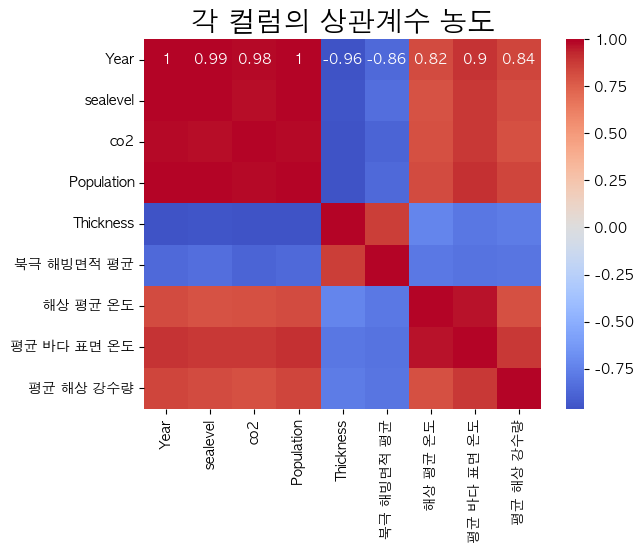

In [133]:
sns.heatmap(data_ver3.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()